In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hour.csv')
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday   
0        1  2011-01-01       1   0     1   0        0        6           0  \
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

- There are no missing values or typos to be imputed.

In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


- those columns (season, yr, mnth, weekday, weathersit) need to be mapped into their real names.
- those collumns (hum, windspeed) need to be trasformed into their real valus.

In [5]:
# create a copy of the original data
preprocessed_data = df.copy()

# transform dteday column into datetime type
preprocessed_data['dteday'] = pd.to_datetime(preprocessed_data['dteday'])

# define a function for mapping values
def map_values(column, mapping):
    preprocessed_data[column] = preprocessed_data[column].map(mapping)

# transform seasons, yr, weekday, and weathersit using the map_values() function
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
map_values('season', seasons_mapping)

yr_mapping = {0: 2011, 1: 2012}
map_values('yr', yr_mapping)

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
map_values('weekday', weekday_mapping)

weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
map_values('weathersit', weather_mapping)

# transform hum and windspeed using the apply() method
preprocessed_data[['hum', 'windspeed']] = preprocessed_data[['hum', 'windspeed']].apply(lambda x: x * 100 if x.name == 'hum' else x * 67)

# Binary Decoding
preprocessed_data[['holiday', 'workingday']] = preprocessed_data[['holiday', 'workingday']].replace({0:'No', 1:'Yes'})

# drop the instant column because there is no use for it
preprocessed_data.drop('instant', axis=1, inplace=True)

# write preprocessed data to CSV file
preprocessed_data.to_csv('preprocessed_data.csv', index=False)


In [168]:
preprocessed_data.head()

dteday  season    yr  mnth  hr holiday   weekday workingday weathersit   
0 2011-01-01  winter  2011     1   0      No  Saturday         No      clear  \
1 2011-01-01  winter  2011     1   1      No  Saturday         No      clear   
2 2011-01-01  winter  2011     1   2      No  Saturday         No      clear   
3 2011-01-01  winter  2011     1   3      No  Saturday         No      clear   
4 2011-01-01  winter  2011     1   4      No  Saturday         No      clear   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  81.0        0.0       3          13   16  
1  0.22  0.2727  80.0        0.0       8          32   40  
2  0.22  0.2727  80.0        0.0       5          27   32  
3  0.24  0.2879  75.0        0.0       3          10   13  
4  0.24  0.2879  75.0        0.0       0           1    1

- Visualizing Distributions. 

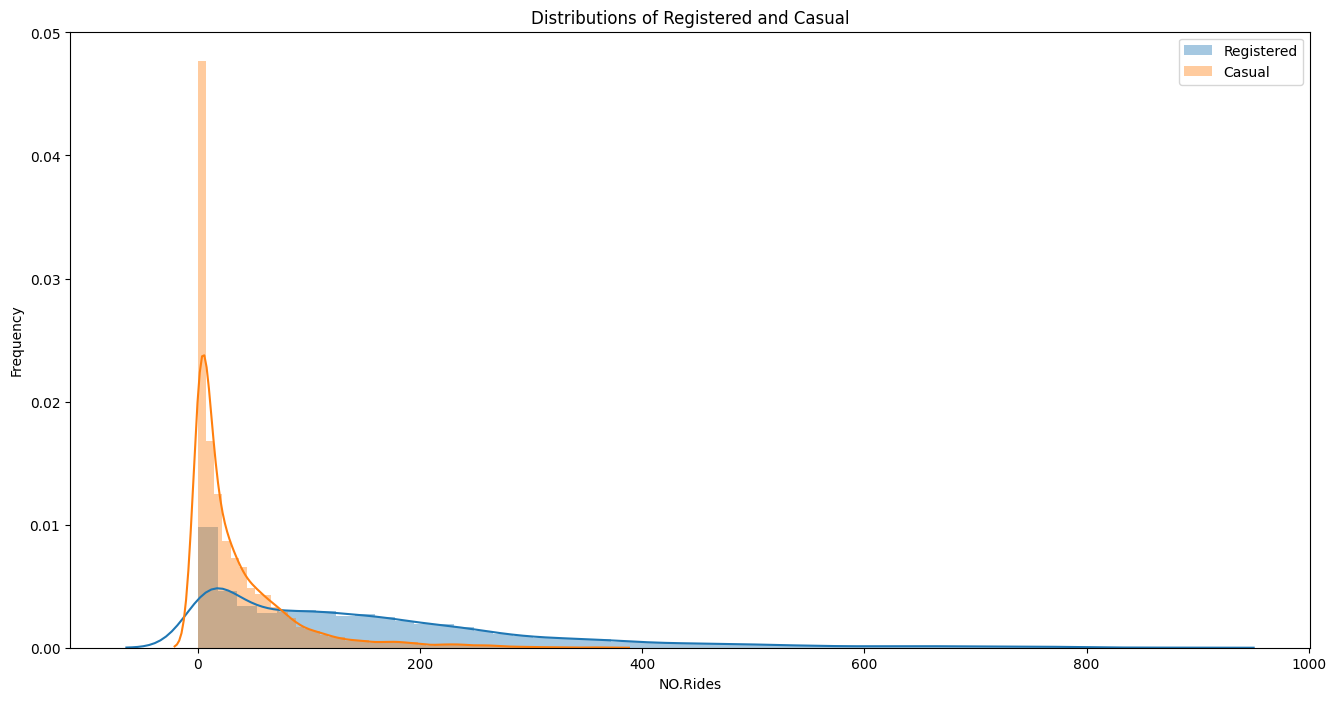

In [169]:
plt.figure(figsize=(16, 8))
sns.distplot(preprocessed_data['registered'], label='Registered')
sns.distplot(preprocessed_data['casual'], label='Casual')
plt.legend()
plt.xlabel('NO.Rides')
plt.ylabel('Frequency')
plt.title('Distributions of Registered and Casual')
plt.savefig('figs/Distributions of Registered and Casual.png', format='png')

- Reviewing the Distribution of all the columns:
    - most of the columns are normally distributed

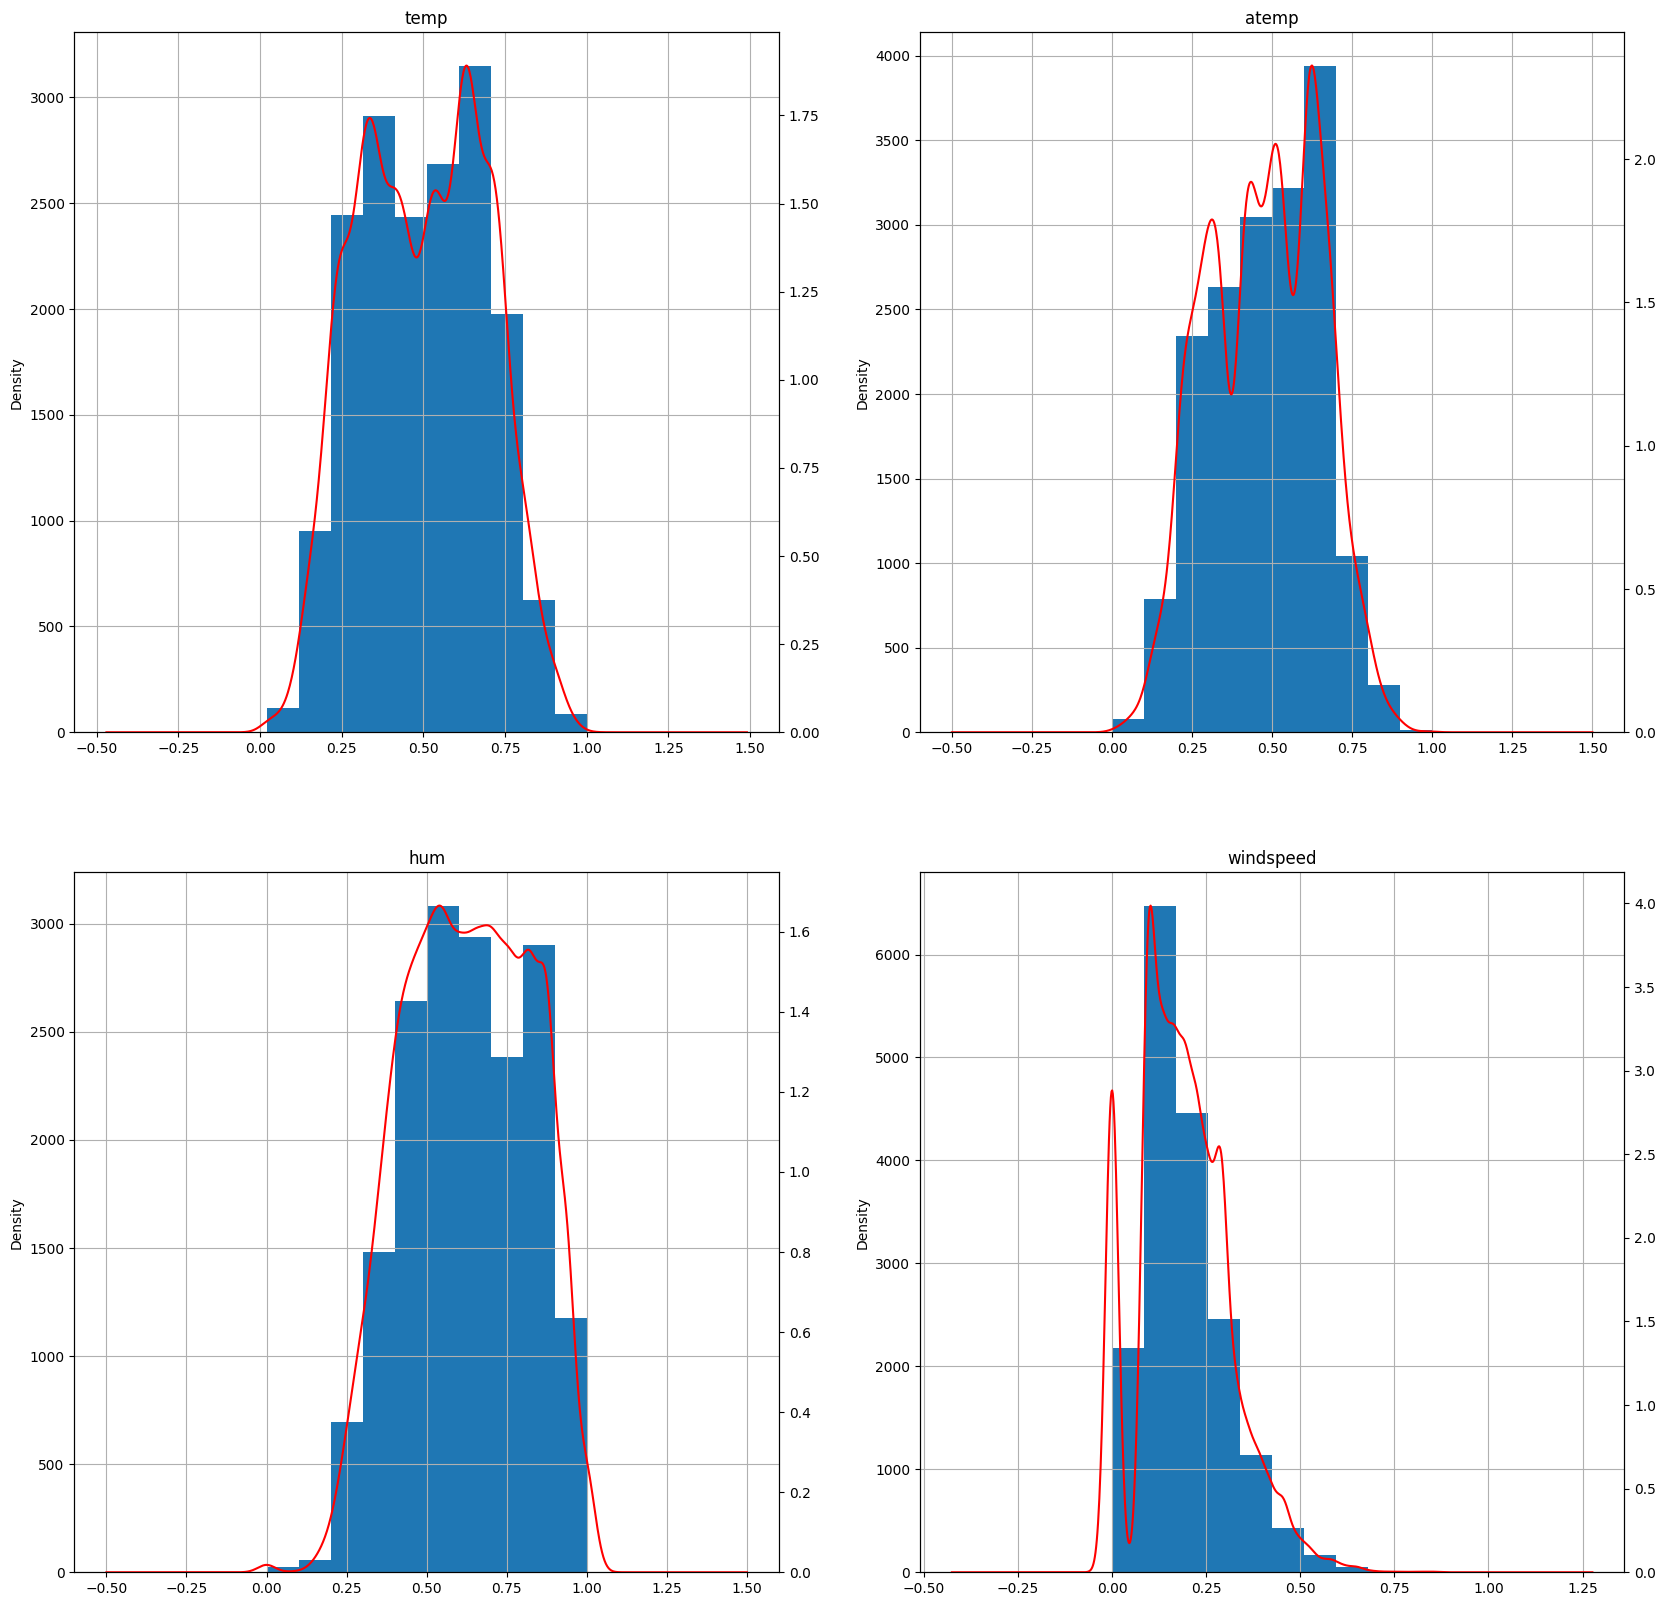

In [170]:
k = len(df.select_dtypes('float').columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(20, 20))
for i, (name, col) in enumerate(df.select_dtypes('float').items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)
plt.savefig('figs/distribtions of all columns with kde.png', format='png', dpi=300)
plt.show()

- Seems there are no Outliers in the data.

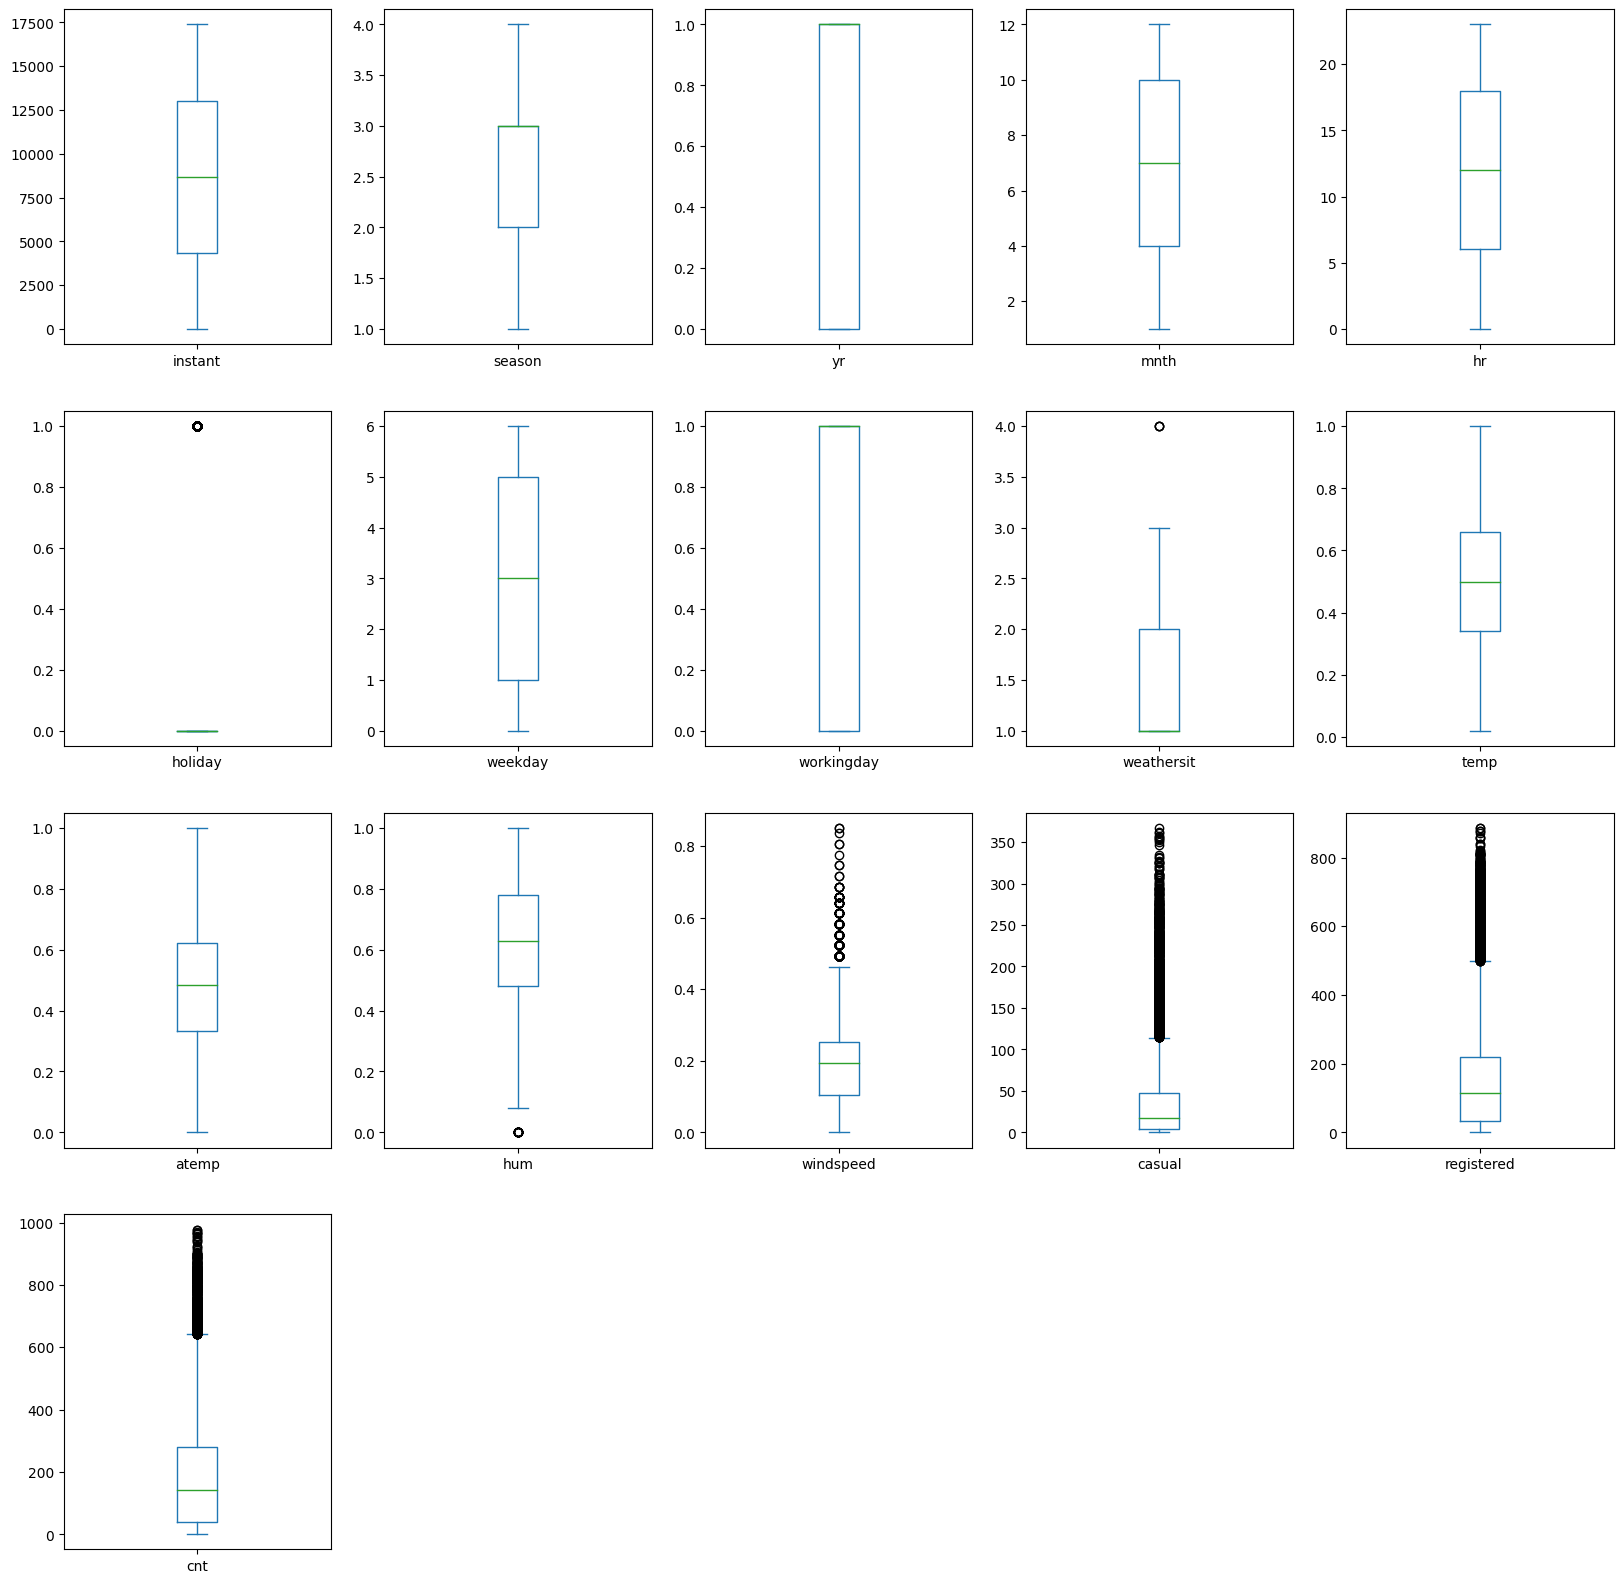

In [171]:
df.plot(kind='box', subplots=True,\
                    sharex=False, sharey=False,\
                    figsize=(20, 20),  layout=(4, 5))
plt.savefig('figs/box plot for all columns.png', format='png', dpi=300)
plt.show()

#### We have three categorical columns `season, weekday, weathersit` and Binary columns `holiday, workingday` and Date columns `hr, mnth`, So we will count the casual and registered values for each column of those.

- I will define a function for Count Plots, Violin Plots and  Mean, Standard Deviation Calculation.

In [172]:
def countplot_func(col, rot=0, figsize=(10, 4)):
    cols = [col, 'casual', 'registered']
    plot_data = preprocessed_data[cols].groupby(col).agg('mean')
    plot_data.plot(rot=rot, kind='bar', figsize=figsize)
    plt.xlabel(col)
    plt.ylabel('Rides')
    plt.title(f'Casual and Registered of each {col} type')
    plt.savefig(f'figs/casual and registered Counts for {col}')
    plt.show()

In [173]:
def mean_std_for_categories(col, target):
    """
    Compute the mean and standard deviation of a target variable for each unique category in a categorical column of a dataframe.

    Parameters:
    -----------
    col : str
        The name of the categorical column.
    target : str
        The name of the target column.

    Returns:
    --------
    None
        Prints the mean and standard deviation values for each category to the console.
    """
    col_types = preprocessed_data[col].unique()
    for col_type in col_types:
        mask = preprocessed_data[col] == col_type
        data = preprocessed_data[target][mask]
        mean = data.mean()
        stddev = data.std()
        print(f"{str(target):12s} --> {col} type: {str(col_type):12s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")
    print('\n')

- As most of the days won't be Holidays:
    - Casual Rides increase at holidays.
    - Registered Rides increase at No-holidays

In [174]:
mean_std_for_categories('holiday', 'casual')
mean_std_for_categories('holiday', 'registered')

casual       --> holiday type: No           | Mean : 35.408 | Stddev: 48.964
casual       --> holiday type: Yes          | Mean : 44.718 | Stddev: 59.041


registered   --> holiday type: No           | Mean : 155.020 | Stddev: 152.211
registered   --> holiday type: Yes          | Mean : 112.152 | Stddev: 111.369




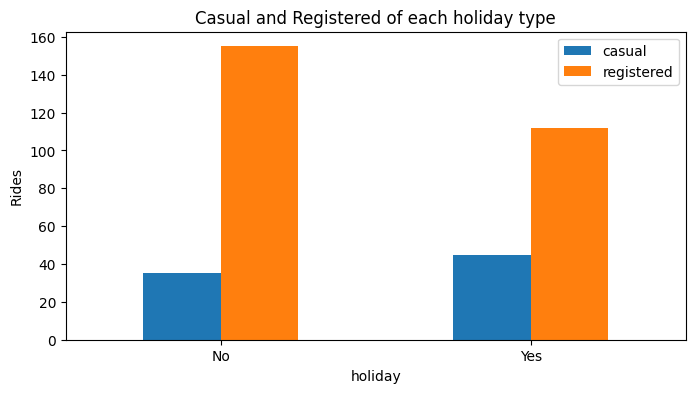

In [175]:
countplot_func('holiday', figsize=(8, 4))

- As most of the days will be workingdays:
    - Casual Rides increase at Weekends.
    - Registered Rides increase at Workingdays.

In [176]:
mean_std_for_categories('workingday', 'casual')
mean_std_for_categories('workingday', 'registered')

casual       --> workingday type: No           | Mean : 57.441 | Stddev: 71.713
casual       --> workingday type: Yes          | Mean : 25.561 | Stddev: 29.130


registered   --> workingday type: No           | Mean : 123.964 | Stddev: 107.780
registered   --> workingday type: Yes          | Mean : 167.646 | Stddev: 165.991




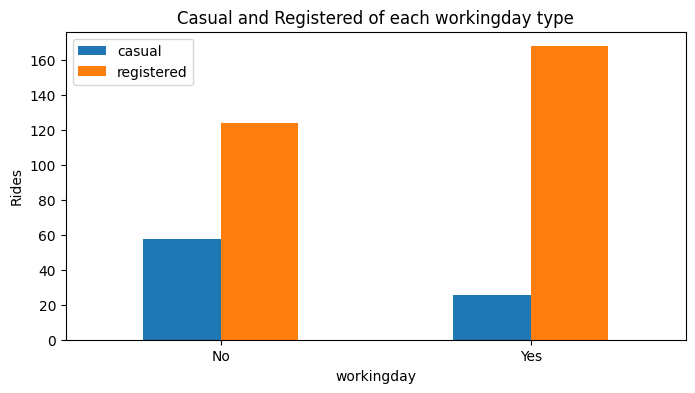

In [177]:
countplot_func('workingday', figsize=(8, 4))

- Clear Weather Situation has the highest number of rides `Casual, Rigestered`
- Cloudy is the second highest

In [178]:
mean_std_for_categories('weathersit', 'casual')
mean_std_for_categories('weathersit', 'registered')

casual       --> weathersit type: clear        | Mean : 40.545 | Stddev: 53.127
casual       --> weathersit type: cloudy       | Mean : 29.595 | Stddev: 41.357
casual       --> weathersit type: light_rain_snow | Mean : 16.056 | Stddev: 30.017
casual       --> weathersit type: heavy_rain_snow | Mean : 2.667 | Stddev: 2.887


registered   --> weathersit type: clear        | Mean : 164.324 | Stddev: 156.890
registered   --> weathersit type: cloudy       | Mean : 145.570 | Stddev: 142.390
registered   --> weathersit type: light_rain_snow | Mean : 95.524 | Stddev: 114.773
registered   --> weathersit type: heavy_rain_snow | Mean : 71.667 | Stddev: 75.049




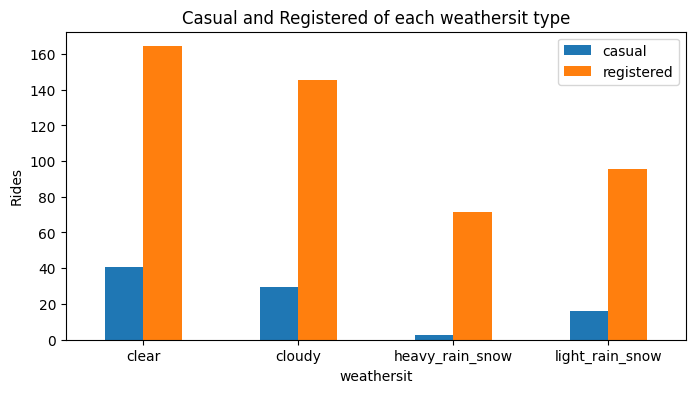

In [179]:
countplot_func('weathersit', figsize=(8, 4))

- Visualizing every hour and days of the week on each season.

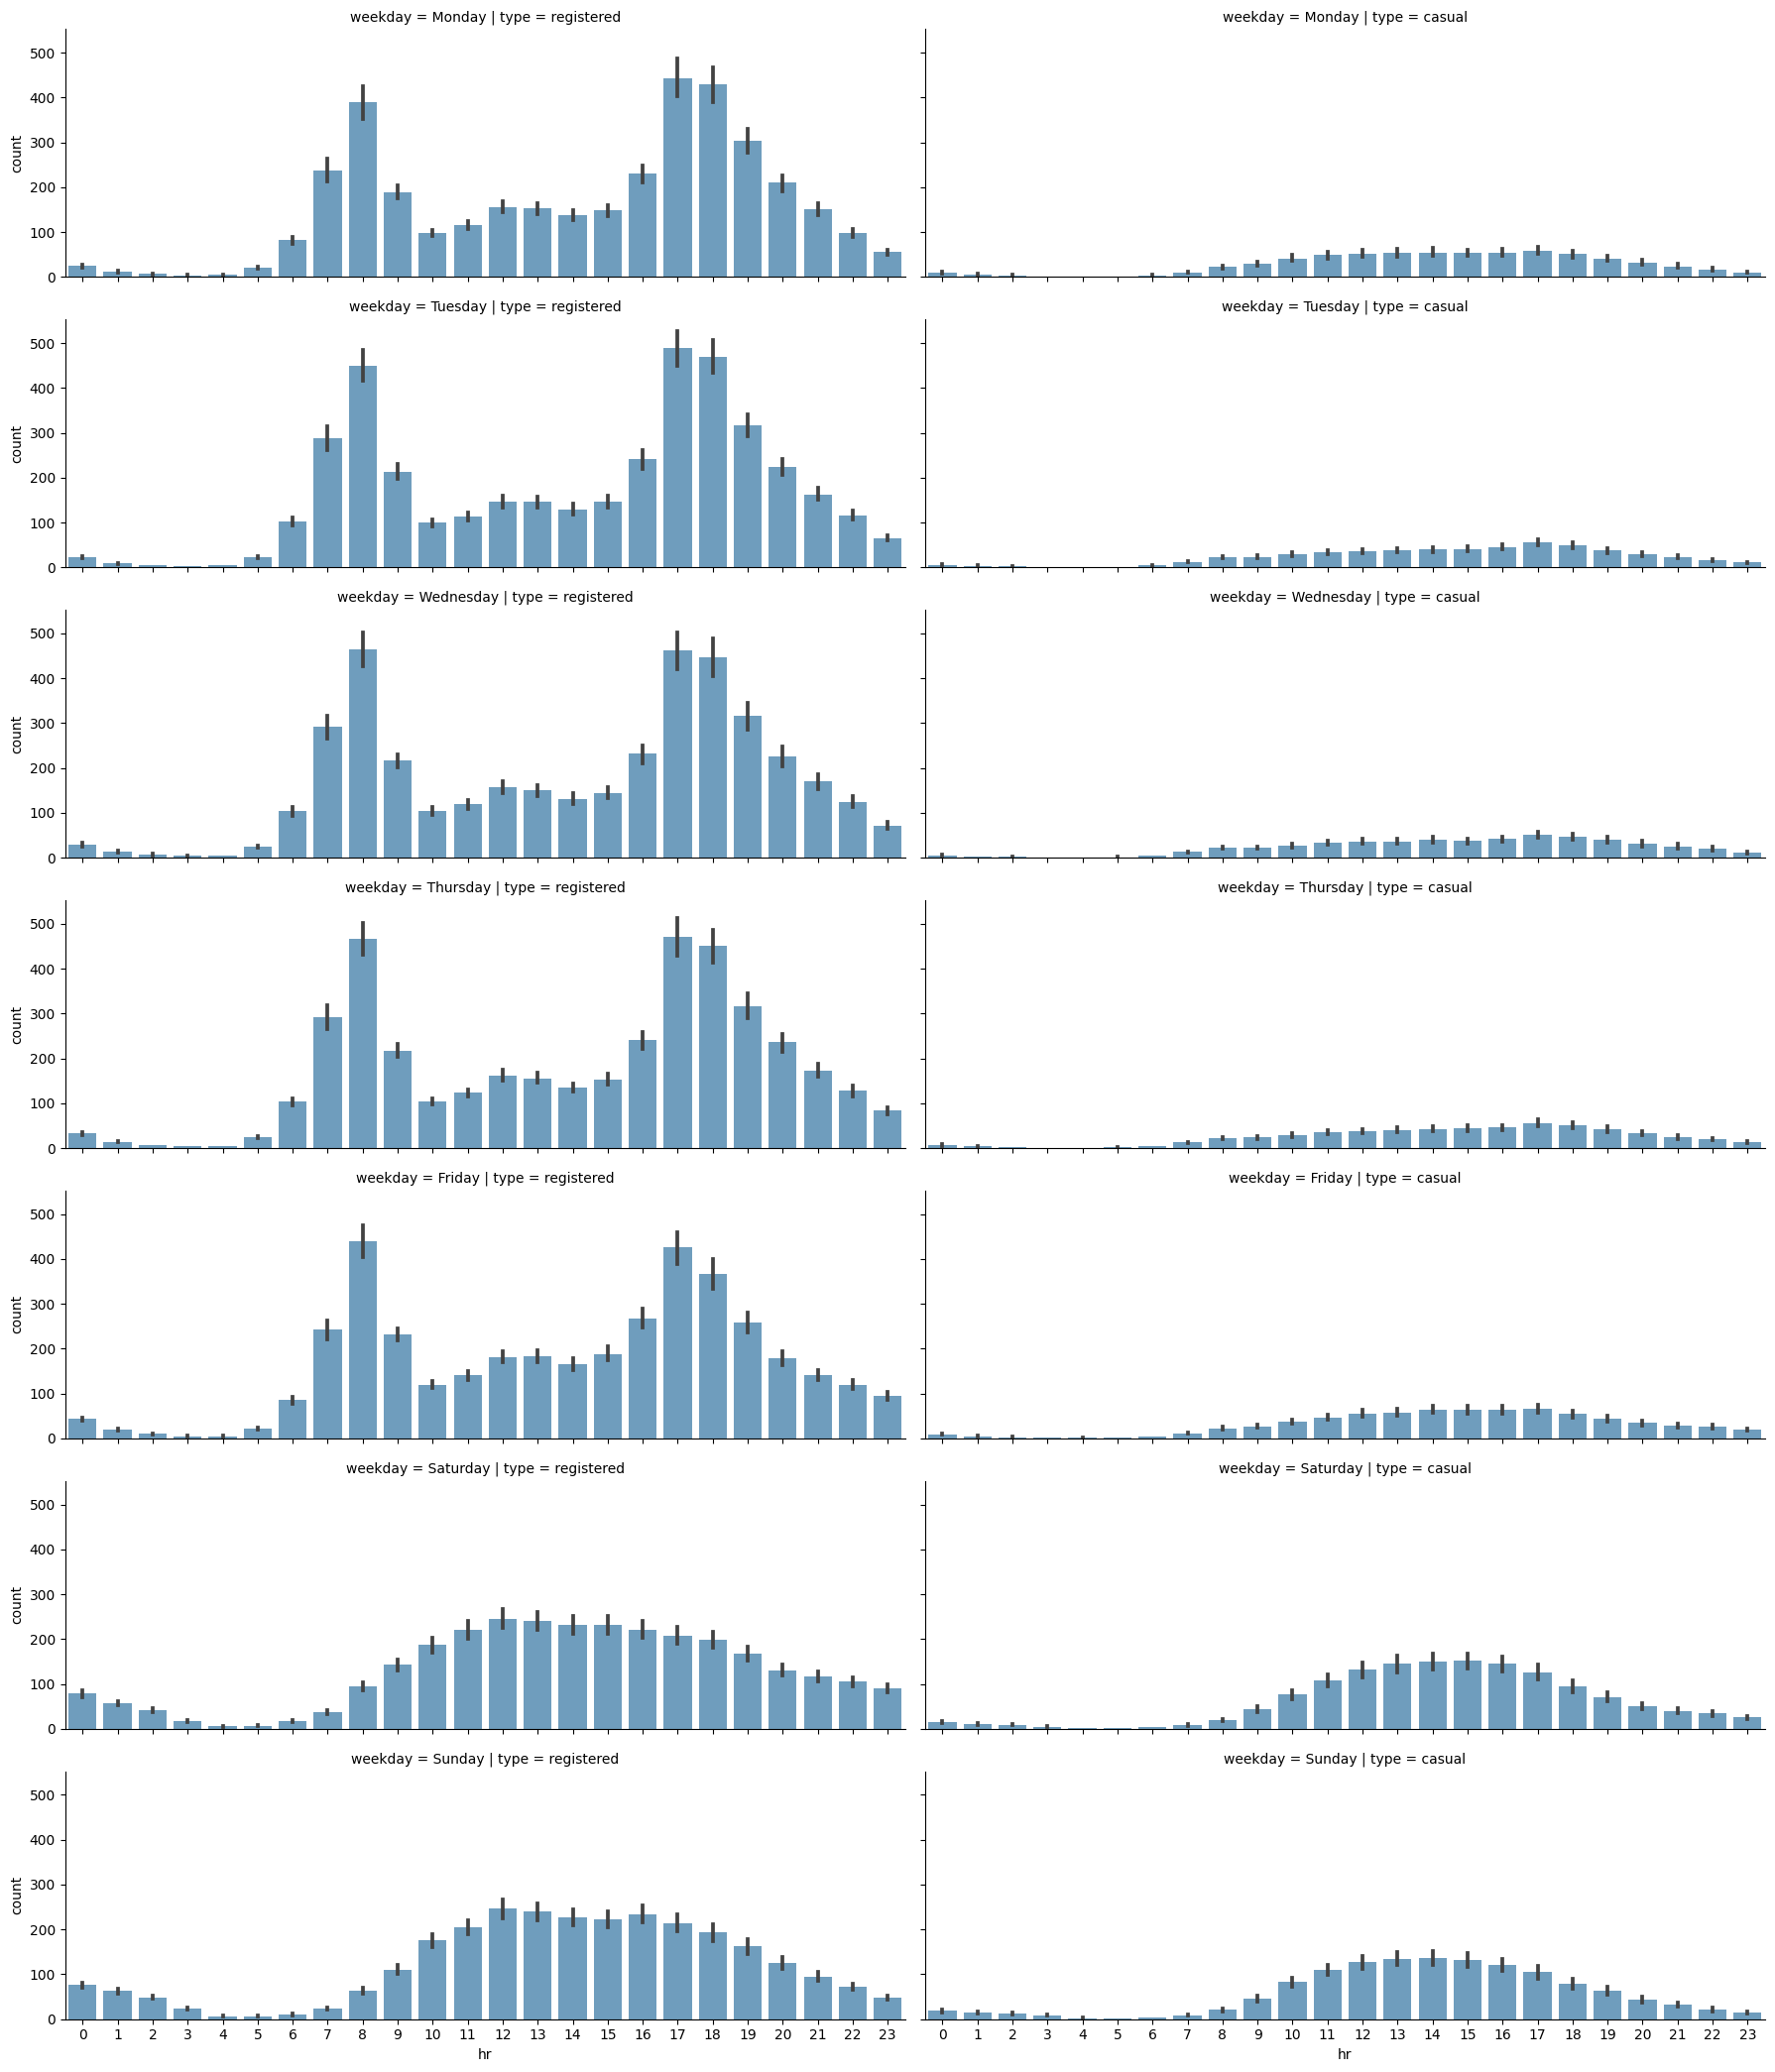

In [180]:
cols = ['hr', 'weekday', 'registered', 'casual']  # Select the needed columns
data = preprocessed_data[cols].melt(id_vars=['weekday', 'hr'],\
                                    var_name='type', value_name='count')  # Create unpivot table to plot

order = ['Monday', 'Tuesday', 'Wednesday',\
         'Thursday', 'Friday', 'Saturday', 'Sunday']  # the order of the days

ax = sns.FacetGrid(data=data, row='weekday',\
                   col='type', row_order=order, height=3, aspect=3)  # face grid for the plots

ax.map(sns.barplot, 'hr', 'count', alpha=0.7)  # apply the barplot  as  our plot

plt.savefig('figs/Rides in each day represented by hours.png', format='png')

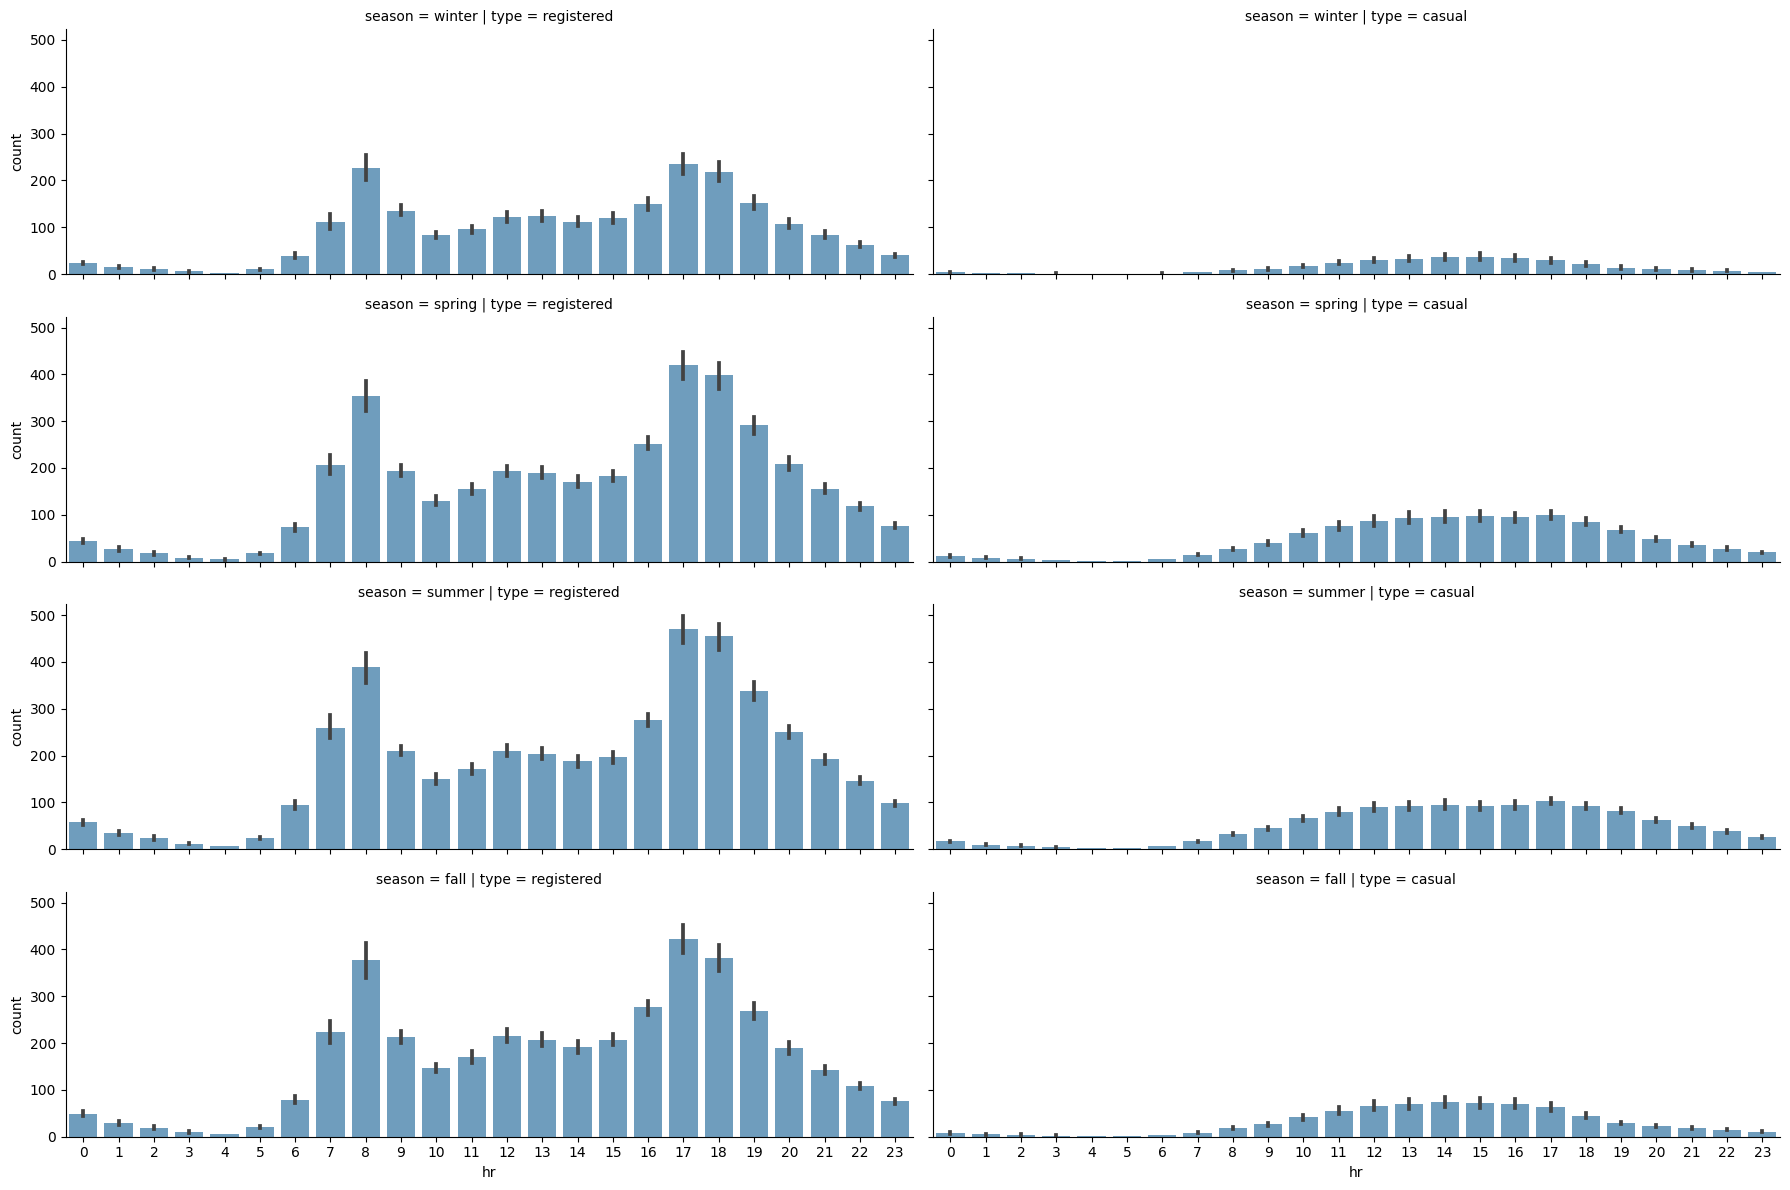

In [181]:
cols = ['hr', 'season', 'registered', 'casual']  # Select the needed columns
data = preprocessed_data[cols].melt(id_vars=['hr', 'season'],\
                                    var_name='type', value_name='count')  # Create unpivot table to plot

order = ['winter', 'spring', 'summer', 'fall']  # the order of the Seasons
ax = sns.FacetGrid(data=data, row='season', col='type',\
                   row_order=order, height=3, aspect=3)  # face grid for the plots

ax.map(sns.barplot, 'hr', 'count', alpha=0.7)  # apply the barplot  as  our plot

plt.savefig('figs/Rides for each by hours of the day.png', format='png')

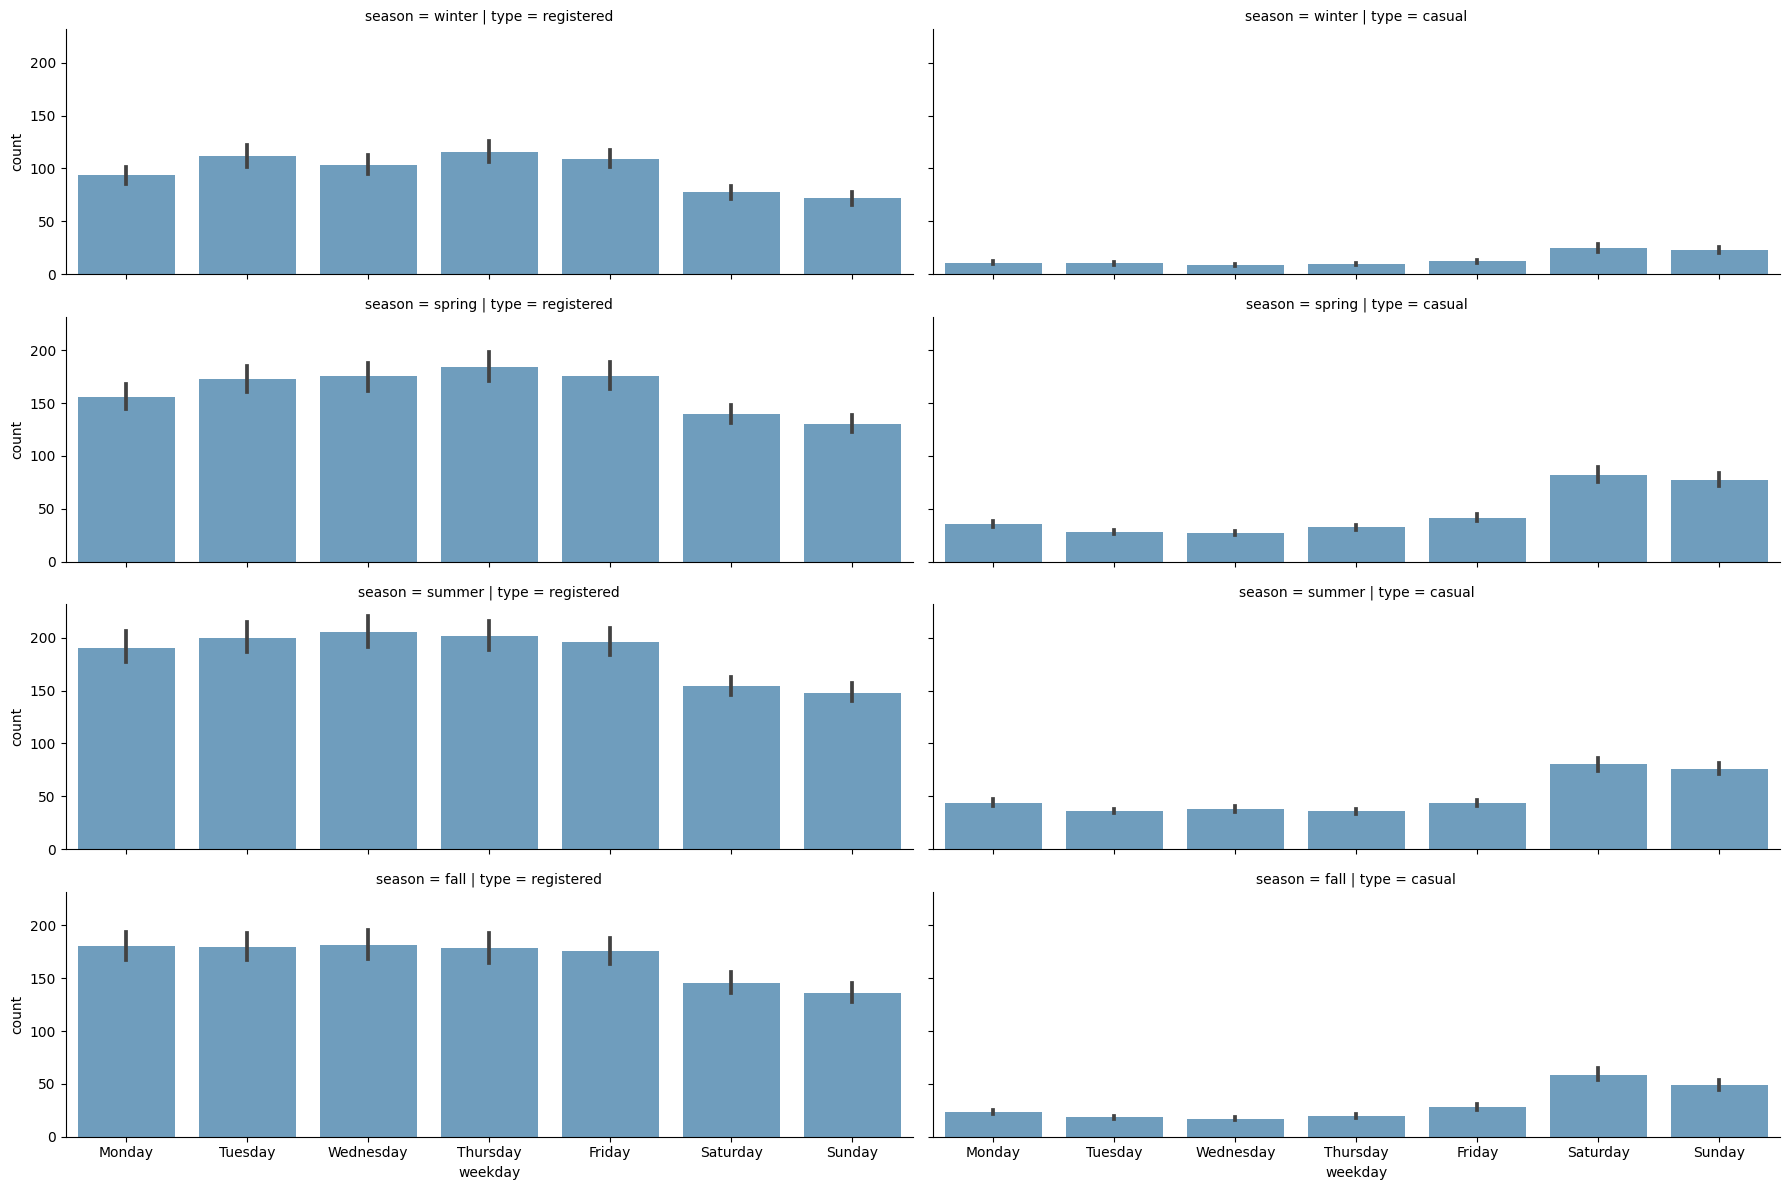

In [182]:
cols = ['weekday', 'season', 'registered', 'casual']  # Select the needed columns
data = preprocessed_data[cols].melt(id_vars=['weekday', 'season'],\
                                    var_name='type', value_name='count')  # Create unpivot table to plot

order = ['winter', 'spring', 'summer', 'fall']  # the order of the Seasons
ax = sns.FacetGrid(data=data, row='season', col='type',\
                   row_order=order, height=3, aspect=3)  # face grid for the plots

plot_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.map(sns.barplot, 'weekday', 'count', order=plot_order, alpha=0.7)  # apply the barplot  as  our plot

plt.savefig('figs/Rides of each season represented by days.png', format='png')

### Visualizing Trends
- Showing the Evolution of Regisered and Casual rides over time.
- Using the rolling mean and standard with window of 24 ``across the day`` deviation to smooth the plot

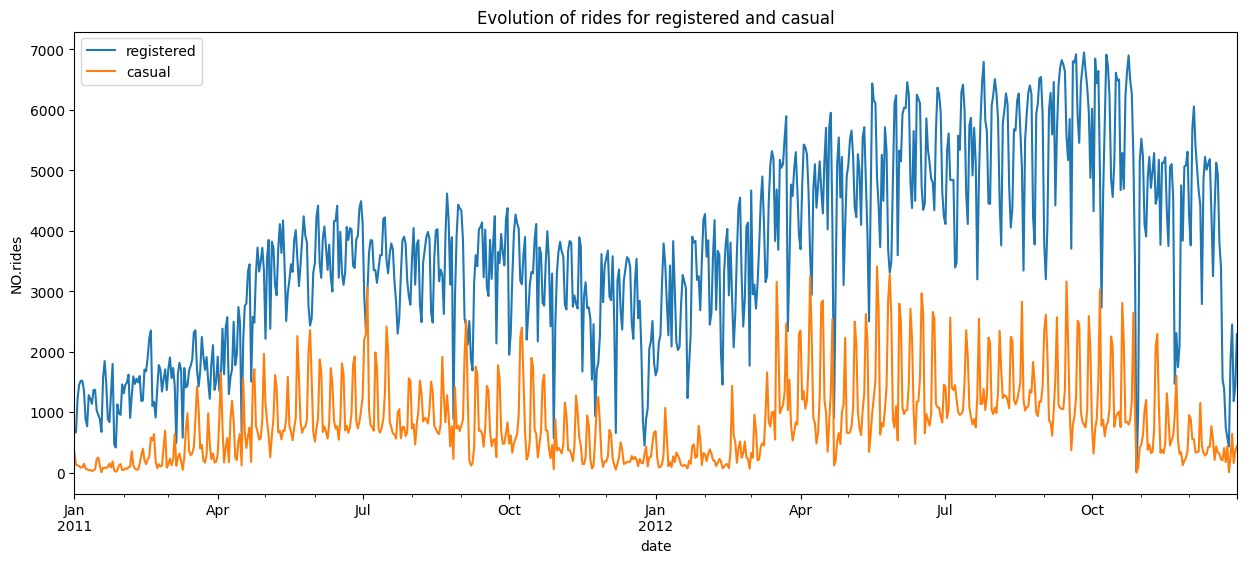

In [183]:
cols = ['dteday', 'registered', 'casual']
data_plot = preprocessed_data[cols].groupby('dteday').sum().plot(figsize=(15,  6))

plt.xlabel('date')
plt.ylabel('NO.rides')
plt.title('Evolution of rides for registered and casual')
plt.savefig('figs/Evolution of rides.png', format='png')

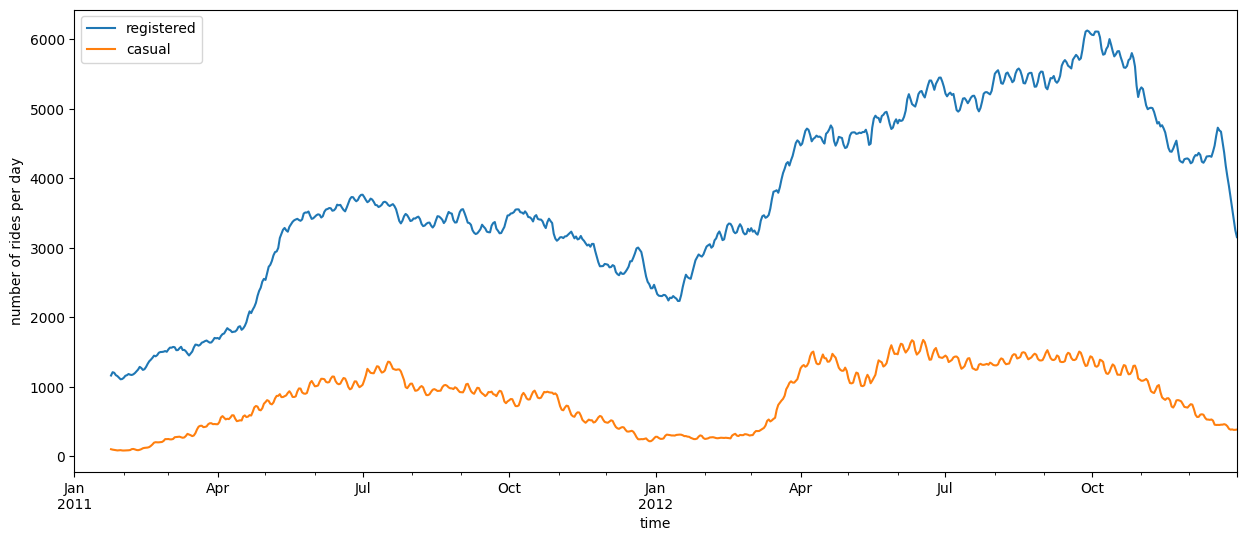

In [199]:
data_plot = preprocessed_data[cols].groupby('dteday').sum()

rolling_means = data_plot.rolling(24).mean()

ax = rolling_means.plot(figsize=(15, 6))

ax.set_xlabel("time")
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_over_days.png', format='png')

### Now it's time for displaying relations.
- We will define a function to plot regression line plot for each numerical column to the target columns (casual, registered).
- Adding the correlation coeficient to the title of the plot.

In [194]:
from scipy.stats import spearmanr

def plot_correlation(cols, data):
    cas = data['casual']
    reg = data['registered']
    for col in cols:
        corr_cas = spearmanr(data[col], cas)[0]
        corr_reg = spearmanr(data[col], reg)[0]
        
        ax = sns.regplot(x=col, y='casual', data=data,\
                label=f"{col}|CASUAL (correlation: {np.round(corr_cas, 3)})",\
                scatter_kws={"alpha":0.5})
        
        ax = sns.regplot(x=col, y='registered', data=data,\
                label=f"{col}|REGISTERED (correlation: {np.round(corr_reg, 3)})",\
                scatter_kws={"alpha":0.05})
        
        ax.legend()
        plt.savefig(f'figs/regression line for {col} on Registered-Casual.png', format='png')
        plt.show()

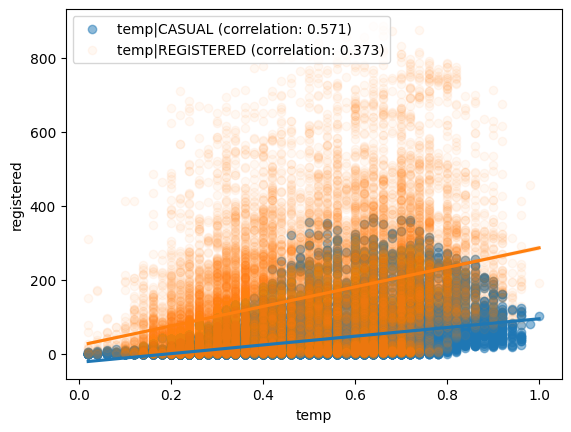

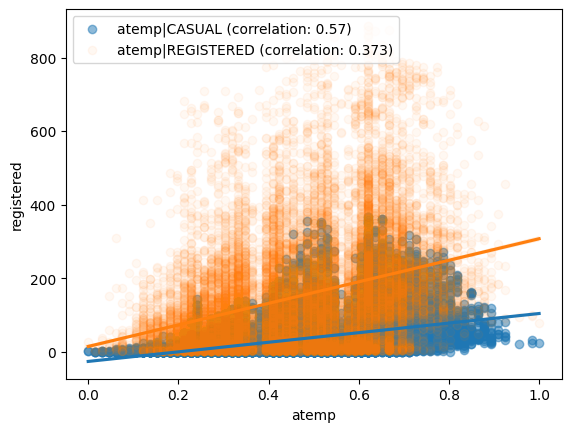

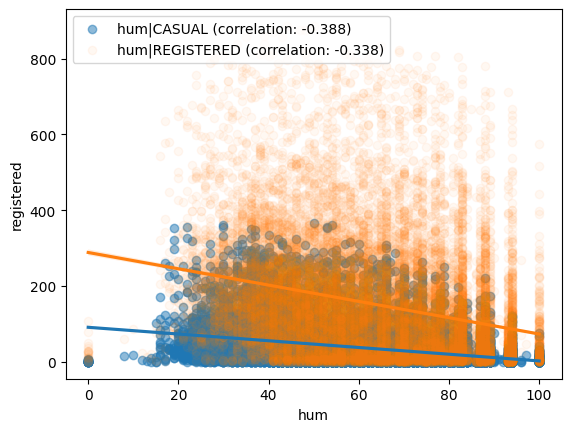

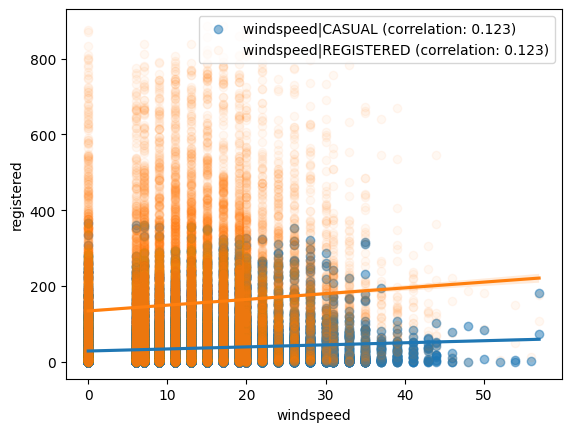

In [195]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']

plot_correlation(numerical_columns, preprocessed_data)

### calculate the impact of each weather condition on the registered and casual rides

In [187]:
from  scipy.stats import pearsonr

def wheather_on_reg_and_cas(data, col_name, weather_cond):
    plot_data = data[data['weathersit'] == weather_cond]

    # compute pearson correlation between col_name and registered rides
    pearson_corr_r = pearsonr(plot_data[col_name], plot_data["registered"])
    
    # compute pearson correlation between col_name and registered rides
    pearson_corr_c = pearsonr(plot_data[col_name], plot_data["casual"])

    ax = sns.regplot(data=plot_data, x=col_name, y='registered', scatter_kws={"alpha":0.09}, label='registered')
    ax = sns.regplot(data=plot_data, x=col_name, y='casual', scatter_kws={"alpha":0.09}, label='casual')

    plt.legend()
    ax.set_xlabel('')
    ax.set_ylabel('Number of Rides')
    ax.set_title(f'{col_name}, {weather_cond}, Corr:{np.round(pearson_corr_r[0], 2)}, P-val:{np.round(pearson_corr_c[1], 3)}')
    return ax

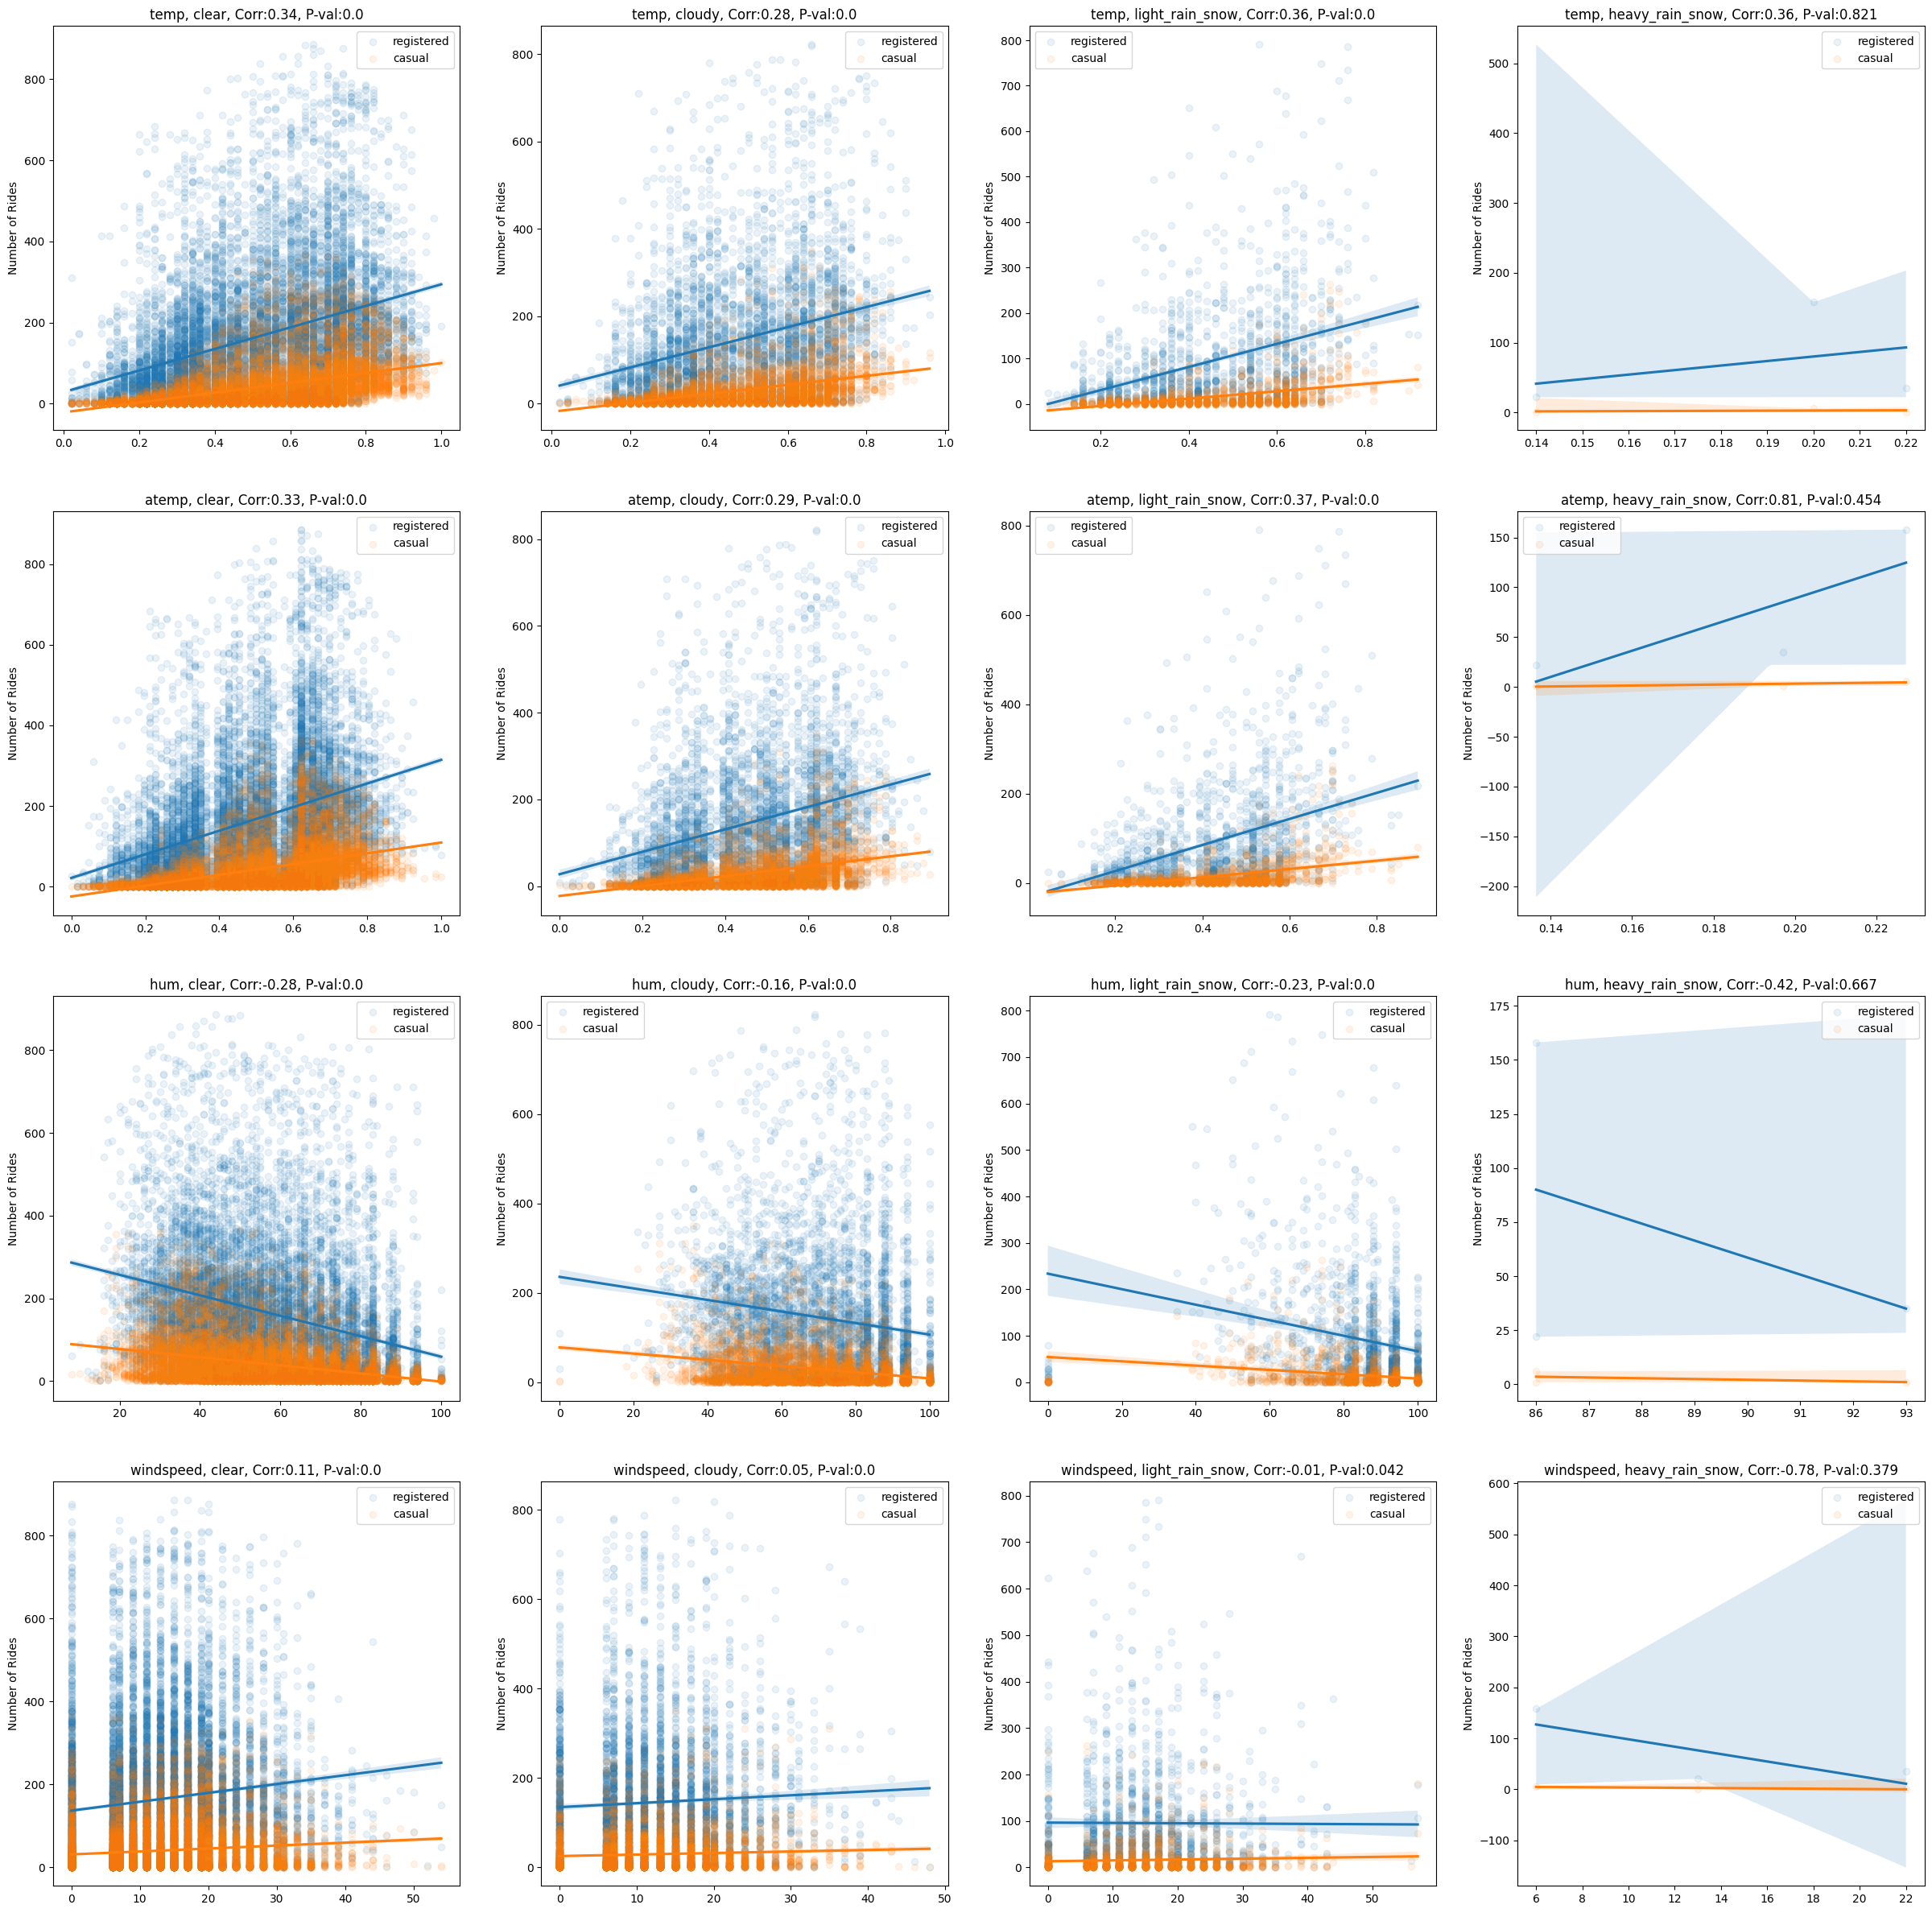

In [188]:
weather_conditions = preprocessed_data.weathersit.unique()
temps = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(30,30))
for col_index, col in enumerate(temps):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index * 4 + 1
        plt.subplot(4, 4, plot_number)
        wheather_on_reg_and_cas(preprocessed_data, col, weather_cond)
plt.savefig('figs/impact_of_weather_and_temp.png', format='png')